# Text Preprocessing
- Text preprocessing is a techinique to process the raw text and clean the text so that we can give the data to model for training

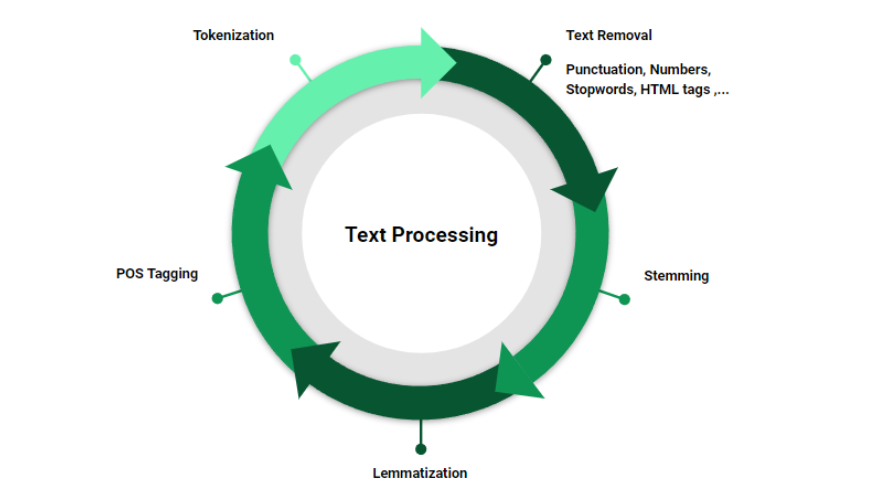

# Import packages

In [1]:
import pandas as pd
import numpy as np
import nltk

# Load Data

In [112]:
df=pd.read_csv('/content/dirty_data.csv')
df.head()

,Unnamed: 0,Clean_Text,Dirty_Text
0,0,I love programming in Python.,I loE programmiN</u>G </u>In PyThON!.v program...
1,1,Machine learning is fascinating.,achine! LearNing is</u> fa;scinatINg.MchinE Le...
2,2,Text preprocessing is an essential step in NLP.,Text prepRoceSing is an ESsential sTep iN nlP....
3,3,Deep learning has transformed AI.,"deep lEarnnG has trAnsfo,Rmed AI.ig has tRanSF..."
4,4,The future of AI lies in responsible usage.,ThE FUture OF I lies in Res</u</b>>ponsible us...


In [113]:
df=df[['Dirty_Text']]
df.head()

,Dirty_Text
0,I loE programmiN</u>G </u>In PyThON!.v program...
1,achine! LearNing is</u> fa;scinatINg.MchinE Le...
2,Text prepRoceSing is an ESsential sTep iN nlP....
3,"deep lEarnnG has trAnsfo,Rmed AI.ig has tRanSF..."
4,ThE FUture OF I lies in Res</u</b>>ponsible us...


# Observation
- Now our data is dirty now we can do text preprocessing

# Text preprocessing Steps

*   Convert text to tokens
*   Remove Pouncation
*   Convert to lower case
*   Lemitization and stemming
*   Remove stopwords
*   Remove Tags
*   Spelling Correction



# Text to tokens
- **Word Tokenize**
- **Sentence Tokenize**

In [114]:
from nltk.tokenize import word_tokenize,sent_tokenize
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [115]:
# Word Tokenize
word_tokenize("hey i am a boy.")

['hey', 'i', 'am', 'a', 'boy', '.']

In [116]:
# sent tokenize
sent_tokenize("hey i am a boy. and i am good")

['hey i am a boy.', 'and i am good']

In [117]:
import re
# Get the only nbr and char
pattern = r'[a-zA-Z0-9]+'
result = re.findall(pattern, "[^a-zA-z0-9]")
result

['a', 'zA', 'z0', '9']

# Spelling Correction

In [6]:
!pip install pyspellchecker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 44.9 MB/s eta 0:00:00


In [118]:
from spellchecker import SpellChecker

# Initialize the spell checker
spell = SpellChecker()

# Misspelled word
misspelled_word = "spelng"

# Correct the word
corrected_word = spell.correction(misspelled_word)
print("Corrected Word:", corrected_word)

Corrected Word: seeing


#Stemming
- In stemming we can find the root word of the given word

In [119]:
from nltk import PorterStemmer

In [120]:
stemer = PorterStemmer()

stemer.stem("Dancing")

'danc'

# Remove Stopwrods
- In this we can remove the stop words b/c stop words can't plat important role generally.

In [121]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [122]:
stop_word = stopwords.words('english')
print(set(stop_word))

{'below', 'ma', "needn't", 'his', 'being', 'shouldn', 'we', 'after', 'but', 'did', 'of', 'doing', 'only', 'me', "should've", 'who', 'further', 'had', 'there', 'mightn', 'our', 'shan', 'on', 'both', "didn't", 'before', 'yours', 'y', 'theirs', 'that', 'to', 'ourselves', "hadn't", 'an', 'then', 'when', 'over', 'aren', 'is', 'again', 'until', 'where', 'ours', 'while', 'some', "won't", 'o', 'out', 'her', 'it', "that'll", 'whom', 'itself', "shan't", 'now', 'yourself', "shouldn't", 'll', 'them', 'against', "haven't", 'i', 'should', "you'll", "mightn't", 'myself', 'what', 'more', 'than', 'will', 'didn', "hasn't", 'they', 'my', 'nor', 'wouldn', "she's", 'their', 'own', 'from', "wouldn't", 'so', 'was', "mustn't", 'were', 'the', 'too', 'into', 'with', 'be', 'couldn', 'am', 'how', 'isn', 'once', 'between', "it's", 'doesn', 'any', "wasn't", 'weren', 'herself', 'a', "aren't", 'ain', 'and', 'why', 'mustn', 'does', 'are', 'she', "you're", 'about', 'above', 'having', 'don', 'haven', 'has', 'your', 'or'

In [123]:
!pip install emoji

In [124]:

import emoji

emoji.demojize("Text prepRoceSing is an ESsential sTep iN nlP.sng is !a:n</a> ESsential sTEp i</a>N ;NLP. 😒<i></u></u><b> PYthoN. 🔥")

'Text prepRoceSing is an ESsential sTep iN nlP.sng is !a:n</a> ESsential sTEp i</a>N ;NLP. :unamused_face:<i></u></u><b> PYthoN. :fire:'

In [129]:
# Make a fun for performing the text preprocessing
def process_text(text):
    """
    This function processes and cleans the input text by performing the following steps:
    - Converts the text to lowercase.
    - Decompose the emoji
    - Removes HTML or XML tags.
    - Extracts only alphanumeric characters (letters and numbers).
    - Applies spelling correction.
    - Performs stemming.

    Parameters:
    text (str): The input text to process.

    Returns:
    str: A string of cleaned and processed words.
    """
    try:
        # convert text into lower case
        text = text.lower()

        # Remove Html Tags
        pattern = r'<[^>]*>'
        text =re.sub(pattern, '', text)

        # Decompose the emoji
        text = emoji.demojize(text)

        token = word_tokenize(text)

        # do spelling correction, steming and remove stop word
        stop_word = set(stopwords.words("english"))
        spell = SpellChecker()
        stemer = PorterStemmer()
        process_text = [
                        stemer.stem(spell.correction(word)) for word in token
                        if word not in stop_word and word.isalnum()
                        ]

        return " ".join(process_text)
    except Exception as e:
        return e

In [130]:
# Test the function
process_text("deep lEarnnG has trAnsfo,Rmed AI.ig has tRanSFoRM</u>eD aI.<a href='https://example.com'> I loE programmiN</u>G </u>In PyThON!.v programMing I</a>n PYthoN. 🔥<b><u><u>")

'deep learn transfer red transform ai love program python program python fire'

In [131]:
# apply the fun
df['Clean_Text'] = df['Dirty_Text'].apply(lambda x:process_text(x))

In [132]:
df.head(2)

,Dirty_Text,Clean_Text
0,I loE programmiN</u>G </u>In PyThON!.v program...,love program python program python fire
1,achine! LearNing is</u> fa;scinatINg.MchinE Le...,machin learn fa learn fascin


# Observation
- Now we can clean the text after cleaning the text we can convert the text into embedding.
- **text:**  `["i","am","a","boy"]`  **Enocode:** `[1,0,0,0,1]` like that

In [133]:
df.head(3)

,Dirty_Text,Clean_Text
0,I loE programmiN</u>G </u>In PyThON!.v program...,love program python program python fire
1,achine! LearNing is</u> fa;scinatINg.MchinE Le...,machin learn fa learn fascin
2,Text prepRoceSing is an ESsential sTep iN nlP....,text reprocess essenti step n essenti step nap


# Observation
- Now we can tokenize the text now we can encode the text means numerical representaion of text.


# Text Encoding
- Count Vectorizer
- Tfidf
- Glove
- Word Embedding

In [134]:
# Count Vectorizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

# Count Vectorizer

In [135]:
# get the text courpus
df['Clean_Text'].tolist()

['love program python program python fire',
 'machin learn fa learn fascin',
 'text reprocess essenti step n essenti step nap',
 'deep learn transfer red transform ai',
 'futur lie rest possibl us lie respons usag e']

In [136]:
vector = CountVectorizer(max_features=100)

In [137]:
vector.fit_transform(df['Clean_Text'].tolist()).toarray()

array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0,
        0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
        1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
        0, 1, 1]])

# Vocabulary

In [138]:
vector.vocabulary_

{'love': 9,
 'program': 13,
 'python': 14,
 'fire': 5,
 'machin': 10,
 'learn': 7,
 'fa': 3,
 'fascin': 4,
 'text': 20,
 'reprocess': 16,
 'essenti': 2,
 'step': 19,
 'nap': 11,
 'deep': 1,
 'transfer': 21,
 'red': 15,
 'transform': 22,
 'ai': 0,
 'futur': 6,
 'lie': 8,
 'rest': 18,
 'possibl': 12,
 'us': 23,
 'respons': 17,
 'usag': 24}

In [149]:
vector.get_feature_names_out()

array(['ai', 'deep', 'essenti', 'fa', 'fascin', 'fire', 'futur', 'learn',
       'lie', 'love', 'machin', 'nap', 'possibl', 'program', 'python',
       'red', 'reprocess', 'respons', 'rest', 'step', 'text', 'transfer',
       'transform', 'us', 'usag'], dtype=object)

# TF-IDF

In [150]:
text_courpus = df['Clean_Text'].tolist()

In [151]:
vector = TfidfVectorizer(max_features=100)

In [152]:
vector.fit_transform(text_courpus).toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.31622777, 0.        , 0.        , 0.        , 0.31622777,
        0.        , 0.        , 0.        , 0.63245553, 0.63245553,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.42243894, 0.42243894,
        0.        , 0.        , 0.68164215, 0.        , 0.        ,
        0.42243894, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.60302269, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.30151134, 0.        , 0.        , 0.        ,
        0.        , 0.30151134, 0.        , 0.        , 0.60302269,
        0.30151134, 0.        , 0.        , 0.

In [153]:
vector.vocabulary_

{'love': 9,
 'program': 13,
 'python': 14,
 'fire': 5,
 'machin': 10,
 'learn': 7,
 'fa': 3,
 'fascin': 4,
 'text': 20,
 'reprocess': 16,
 'essenti': 2,
 'step': 19,
 'nap': 11,
 'deep': 1,
 'transfer': 21,
 'red': 15,
 'transform': 22,
 'ai': 0,
 'futur': 6,
 'lie': 8,
 'rest': 18,
 'possibl': 12,
 'us': 23,
 'respons': 17,
 'usag': 24}

In [154]:
vector.idf_

array([2.09861229, 2.09861229, 2.09861229, 2.09861229, 2.09861229,
       2.09861229, 2.09861229, 1.69314718, 2.09861229, 2.09861229,
       2.09861229, 2.09861229, 2.09861229, 2.09861229, 2.09861229,
       2.09861229, 2.09861229, 2.09861229, 2.09861229, 2.09861229,
       2.09861229, 2.09861229, 2.09861229, 2.09861229, 2.09861229])

In [155]:
!pip install sentence-transformers

In [156]:

from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-mpnet-base-v2') # or any other suitable model


sentences = df['Clean_Text'].tolist()
embeddings = model.encode(sentences)

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning:

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:86: UserWarning:


Access to the secret `HF_TOKEN` has not been granted on this notebook.
You will not be requested again.
Please restart the session if you want to be prompted again.



modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [157]:
embeddings

array([[ 0.01322512, -0.02280377, -0.01838868, ...,  0.05902858,
        -0.0117287 , -0.01554738],
       [-0.02040521, -0.00764358, -0.00474159, ...,  0.01950255,
        -0.00381629, -0.01280396],
       [-0.01524015, -0.0242576 , -0.02062756, ..., -0.05095099,
        -0.0736858 , -0.04037958],
       [-0.00898495,  0.03662914,  0.00942114, ..., -0.00139469,
        -0.0110592 , -0.0201436 ],
       [-0.00563759,  0.01364068,  0.0164395 , ...,  0.00850041,
        -0.00842863, -0.02820186]], dtype=float32)

In [158]:
embeddings.shape

(5, 768)

In [159]:
embeddings[0]

array([ 1.32251177e-02, -2.28037704e-02, -1.83886811e-02, -2.02142987e-02,
        6.26834435e-03,  4.60640006e-02,  7.02941651e-03, -2.97789485e-03,
        2.10846271e-02, -1.50457127e-02, -4.35025878e-02,  3.49897593e-02,
        2.97053065e-03,  8.58383924e-02, -3.15518640e-02, -4.00302969e-02,
        1.64361426e-03, -9.03113559e-03,  2.56779790e-02, -3.12026055e-03,
        6.98825251e-03,  4.97847311e-02, -2.34481618e-02,  1.59029551e-02,
       -3.13234143e-03, -9.94554907e-03, -4.46601845e-02, -4.60849283e-03,
        1.51187908e-02, -5.60362078e-02, -1.11541515e-02, -7.18784984e-03,
       -3.57965641e-02,  5.78093976e-02,  1.46449042e-06, -4.19188142e-02,
       -1.34395044e-02, -7.44236493e-03, -9.10917670e-03, -1.76160317e-02,
        1.39797702e-01,  2.49064993e-02,  3.27079855e-02,  1.64846703e-02,
       -6.46684831e-03, -1.65466722e-02,  4.01617773e-02, -5.42116836e-02,
        4.04435173e-02,  3.10370121e-02,  1.83084905e-02, -4.69348766e-02,
        1.36022838e-02, -

# Observation
- Now we can see how to convert the text into embedding.
- Now we can convert the embeddings into 2 or 3d using PCA so that we can plot them

In [160]:
from sklearn.decomposition import PCA

In [165]:
pca = PCA(n_components=3)

In [166]:
pca.fit_transform(embeddings)

array([[ 0.60500973,  0.5147204 , -0.34273353],
       [-0.02808366,  0.27170298,  0.74331707],
       [-0.09226594, -0.3318283 , -0.14271988],
       [ 0.26547548, -0.6650232 ,  0.02129883],
       [-0.7501354 ,  0.21042813, -0.27916282]], dtype=float32)

In [167]:
pca.components_

array([[ 0.01172436, -0.0117518 , -0.0187599 , ...,  0.03283973,
         0.00316955,  0.01039793],
       [ 0.01187614, -0.02913588, -0.00717807, ...,  0.05912447,
         0.02454353,  0.01002684],
       [-0.02099888,  0.00334081,  0.00173442, ..., -0.00112585,
         0.01797346,  0.01173092]], dtype=float32)

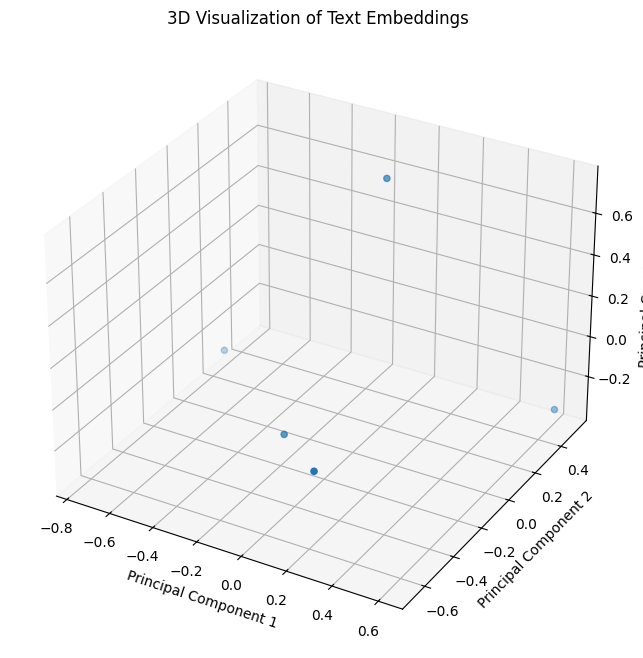

In [170]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D  # Import for 3D plotting


# Assuming 'pca' is the PCA object fitted to your embeddings
embeddings_3d = pca.fit_transform(embeddings)

# Create a DataFrame for plotting
plot_df = pd.DataFrame(embeddings_3d, columns=['PC1', 'PC2', "PC3"])
plot_df['text'] = df['Clean_Text'].tolist()  # Add the original text for labels

# Create the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')  # Create a 3D subplot

# Scatter plot
ax.scatter(plot_df['PC1'], plot_df['PC2'], plot_df['PC3'])

# Set labels and title
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D Visualization of Text Embeddings')

plt.show()